In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1, 0.1], [0.1, 1.2]])

# print mean_01
# print cov_01

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

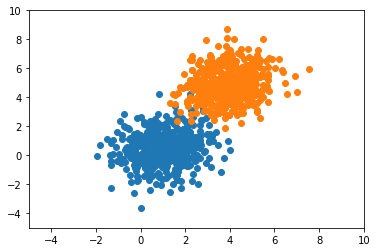

In [3]:
plt.figure(0)
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1])#, color='red')
plt.show()

In [4]:
data= np.concatenate((dist_01,dist_02))
print (data.shape)

(1000, 2)


In [5]:
def distance(x1,x2):
    return np.sqrt(((x1-x2)**2).sum())

In [6]:
K = 4

clusters = {}

for ix in range(K):
    center = {
        'coords': np.random.uniform(data.min(), data.max(), (data.shape[1],)),
        'history': [],
        'points': [],
    }
    clusters[ix] = center
print (clusters)

colors = ['red', 'yellow', 'cyan', 'orange']

{0: {'coords': array([0.69930311, 7.14666192]), 'history': [], 'points': []}, 1: {'coords': array([4.91812106, 2.67537826]), 'history': [], 'points': []}, 2: {'coords': array([ 7.42876263, -1.73379897]), 'history': [], 'points': []}, 3: {'coords': array([6.25888404, 5.58335623]), 'history': [], 'points': []}}


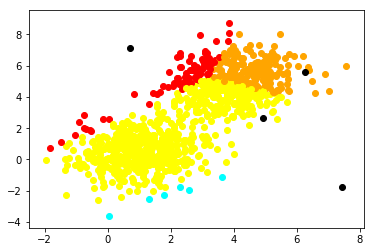

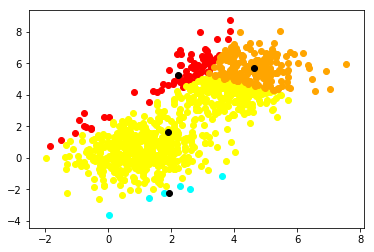

In [7]:
plt.figure(0)
for ix in range(data.shape[0]):
    d = []
    for cx in range(K):
        # Compute and append distances
        d.append(distance(data[ix], clusters[cx]['coords']))
    # Get the min distance cluster
    c_id = np.argmin(d)
    plt.scatter(data[ix, 0], data[ix, 1], color=colors[c_id])
    
    # Append point to cluster
    clusters[c_id]['points'].append(data[ix])

# Visualize cluster centers
for cx in range(K):
    plt.scatter(clusters[cx]['coords'][0], clusters[cx]['coords'][1], color='black')


plt.figure(1)
# Update cluster centers
for cx in range(K):
    # Update history
    clusters[cx]['history'].append(clusters[cx]['coords'])
    
    if len(clusters[cx]['points']) is not 0:
        # Reinitialize cluster center with mean
        clusters[cx]['coords'] = np.asarray(clusters[cx]['points']).mean(axis=0)
    pts = np.asarray(clusters[cx]['points'])
    plt.scatter(pts[:, 0], pts[:, 1], color=colors[cx])
    plt.scatter(clusters[cx]['coords'][0], clusters[cx]['coords'][1], color='black')
    # Empty points in cluster
    clusters[cx]['points'] = []

plt.show()

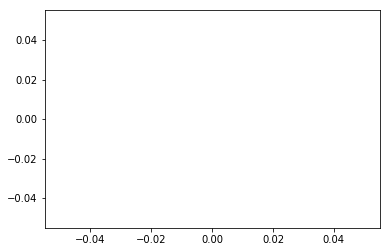

In [8]:
plt.figure(0)
for cx in range(K):
    d = []
    for pt in range(1, len(clusters[cx]['history'])):
        d.append(distance(clusters[cx]['history'][pt], clusters[cx]['history'][pt-1]))
    plt.plot(d)
plt.show()

In [9]:
from sklearn.cluster import KMeans

<function matplotlib.pyplot.show(*args, **kw)>

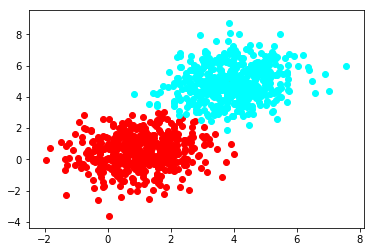

In [10]:
clf = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
clf.fit(data)
#print clf.labels_
a=clf.cluster_centers_
clf.fit_predict

plt.figure(0)
for ix in range(2):
    plt.scatter(a[ix][0],a[ix][1],color='orange')
for cx in range(clf.labels_.size):
    if clf.labels_[cx]==0:
        plt.scatter(data[cx,0],data[cx,1],color='red')
    elif clf.labels_[cx]==1:
        plt.scatter(data[cx,0],data[cx,1],color='cyan')
        

plt.show

In [ ]:
clf.fit_predict?

In [ ]:
plt.subplot?
